In [0]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [0]:
%matplotlib inline

In [0]:
import requests
from io import StringIO

In [0]:
# アメリカ合衆国大統領選挙世論調査データ
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

In [0]:
source = requests.get(url).text

In [7]:
source

'Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration\nPolitico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000,Likely Voters,Live Phone,47.0,47.0,6.0,,https://elections.huffingtonpost.com/pollster/polls/politico-gwu-battleground-16674,http://www.politico.com/news/stories/1112/83380.html,Nonpartisan,None,,1\nYouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740,Likely Voters,Internet,49.0,47.0,3.0,,https://elections.huffingtonpost.com/pollster/polls/yougov-economist-16733,http://cdn.yougov.com/cumulus_uploads/document/6pkdh10fns/econToplines.pdf,Nonpartisan,None,,1\nGravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872,Likely Voters,Automated Phone,48.0,48.0,4.0,,https://elections.huffingtonpost.com/pollster/polls/gravis-marketing-16681,http://www.gravispolls.com/2012/11/gravis-marketing-national-poll-shows.h

In [0]:
poll_data = StringIO(source) # データをファイルのように扱える

In [0]:
poll_df = pd.read_csv(poll_data)

In [10]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [11]:
poll_df[['Pollster', 'Partisan', 'Affiliation']].sort_values('Pollster').drop_duplicates()

,Pollster,Partisan,Affiliation
404,ABC/Post,Nonpartisan,None
471,AP-GfK,Nonpartisan,None
90,ARG,Nonpartisan,None
132,Allstate/National Journal,Nonpartisan,None
305,Angus-Reid,Nonpartisan,None
...,...,...,...
105,United Technologies/National Journal,Nonpartisan,None
62,Washington Times/JZ Analytics,Nonpartisan,None
18,YouGov,Nonpartisan,None
533,YouGov/Economist,Nonpartisan,None


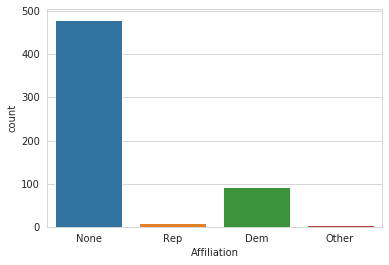

In [12]:
sns.countplot('Affiliation', data=poll_df)

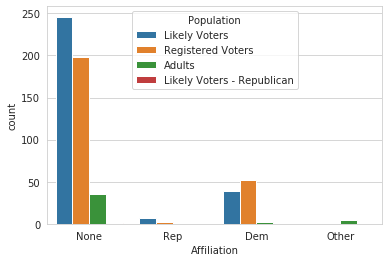

In [13]:
sns.countplot('Affiliation', data=poll_df, hue='Population')

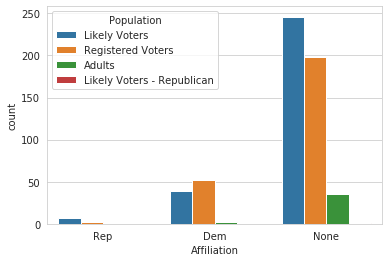

In [14]:
sns.countplot('Affiliation', data=poll_df, hue='Population', order=['Rep', 'Dem', 'None'])

In [0]:
avg = pd.DataFrame(poll_df.mean())

In [16]:
avg

,0
Number of Observations,1296.679078
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN
Question Iteration,1.000000


In [0]:
labels = ['Number of Observations','Other', 'Question Text', 'Question Iteration']
for label in labels:
  avg.drop(label, axis=0, inplace=True)

In [18]:
avg

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827


In [0]:
std = pd.DataFrame(poll_df.std())
labels = ['Number of Observations','Other', 'Question Text', 'Question Iteration']
for label in labels:
  std.drop(label, axis=0, inplace=True)

In [20]:
std

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754


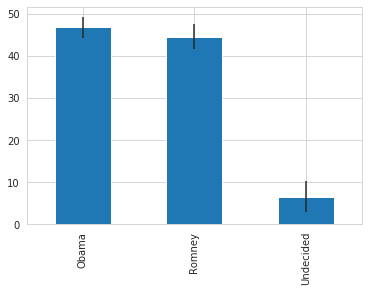

In [21]:
avg.plot(yerr=std, kind='bar', legend=False)

In [0]:
poll_avg = pd.concat([avg, std], axis=1)
poll_avg.columns = ['Average', 'STD']

In [23]:
poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754


In [24]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


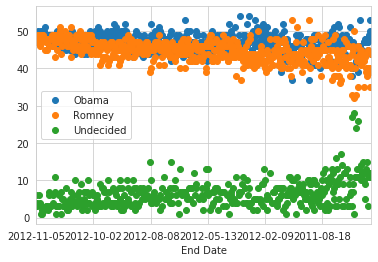

In [25]:
poll_df.plot(x='End Date', y=['Obama', 'Romney', 'Undecided'], marker='o', linestyle='')

In [0]:
from datetime import datetime

In [0]:
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney) / 100

In [28]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


In [0]:
poll_df = poll_df.groupby(['Start Date'], as_index=False).mean()

In [30]:
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


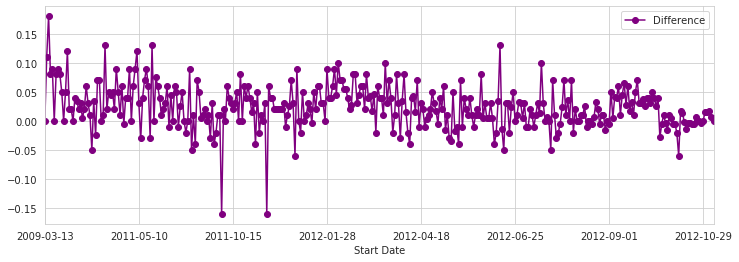

In [31]:
fig = poll_df.plot('Start Date', 'Difference', figsize=(12,4), marker='o', linestyle='-', color='purple')

In [0]:
# 討論会 2012/10/3 10/11 10/22

In [34]:
poll_df[poll_df['Start Date'].apply(lambda x: x.startswith('2012-10'))].head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
325,2012-10-01,1746.0,48.500000,46.000000,3.0,NaN,NaN,1,0.025000
326,2012-10-02,590.0,49.000000,45.000000,6.0,NaN,NaN,1,0.040000
327,2012-10-04,1061.5,45.833333,48.666667,6.0,NaN,NaN,1,-0.028333
328,2012-10-05,1000.0,46.000000,46.500000,7.0,1.0,NaN,1,-0.005000
329,2012-10-06,895.0,46.500000,45.500000,4.5,3.0,NaN,1,0.010000


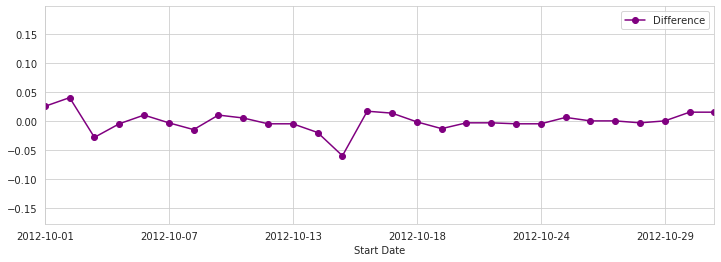

In [35]:
fig = poll_df.plot('Start Date', 'Difference', figsize=(12,4), marker='o', linestyle='-', color='purple', xlim=(325,352))

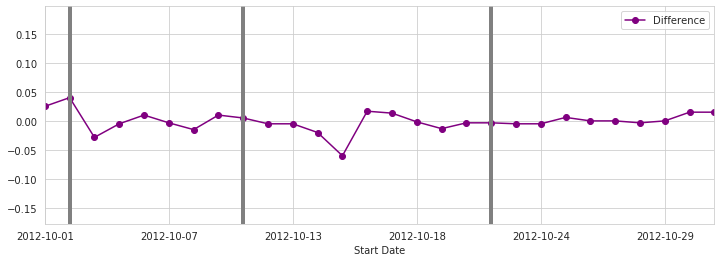

In [36]:
fig = poll_df.plot('Start Date', 'Difference', figsize=(12,4), marker='o', linestyle='-', color='purple', xlim=(325,352))
plt.axvline(x=326, linewidth=4, color='gray')
plt.axvline(x=333, linewidth=4, color='gray')
plt.axvline(x=343, linewidth=4, color='gray')

In [37]:
from google.colab import files
uploaded = files.upload()

Saving Election_Donor_Data.csv to Election_Donor_Data.csv


In [38]:
donor_df = pd.read_csv('Election_Donor_Data.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [39]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [40]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [41]:
donor_df['contb_receipt_amt'].value_counts()

100.00    178188
50.00     137584
25.00     110345
250.00     91182
500.00     57984
           ...  
97.15          1
122.32         1
188.65         1
122.40         1
132.12         1
Name: contb_receipt_amt, Length: 8079, dtype: int64

In [42]:
donor_df['contb_receipt_amt'].value_counts().shape

(8079,)

In [45]:
don_mean = donor_df['contb_receipt_amt'].mean()
don_std = donor_df['contb_receipt_amt'].std()
print('平均{:0.2f} 標準偏差{:0.2f}'.format(don_mean, don_std))

平均298.24 標準偏差3749.67


In [49]:
top_donor = donor_df['contb_receipt_amt'].copy()
top_donor.sort_values()

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
             ...    
319478     526246.17
344419    1511192.17
344539    1679114.65
326651    1944042.43
325136    2014490.51
Name: contb_receipt_amt, Length: 1001731, dtype: float64

In [0]:
top_donor = top_donor[top_donor > 0]
top_donor = top_donor.sort_values()

In [51]:
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

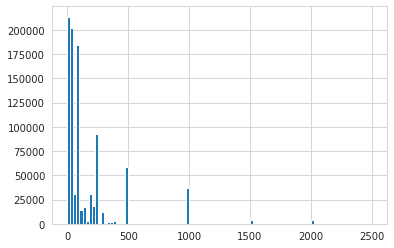

In [52]:
com_don = top_donor[top_donor < 2500]
com_don.hist(bins=100)

In [0]:
# 所属政党ごとに寄付を分析

In [0]:
candidates = donor_df.cand_nm.unique()

In [55]:
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [0]:
# 所属政党の辞書です。
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

# データに政党をつける
donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [57]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [0]:
donor_df = donor_df[donor_df.contb_receipt_amt > 0]

In [59]:
# 候補者ごとの寄付の額を分析
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [60]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [0]:
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

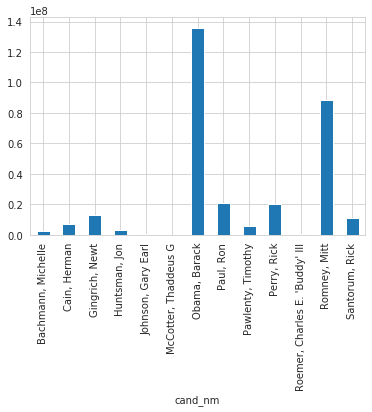

In [62]:
cand_amount.plot(kind='bar')

In [0]:
# 政党ごとの寄付額を分析

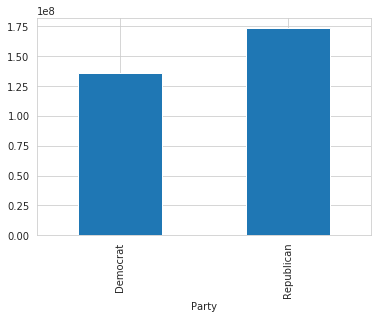

In [64]:
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

In [0]:
# 職業ごとの寄付の傾向分析

In [0]:
occupation_df = donor_df.pivot_table('contb_receipt_amt', index='contbr_occupation', columns='Party', aggfunc='sum')

In [67]:
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [68]:
occupation_df.shape

(45067, 2)

In [0]:
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]

In [70]:
occupation_df.shape

(31, 2)

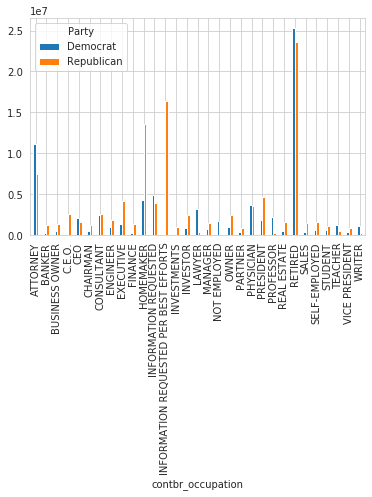

In [71]:
occupation_df.plot(kind='bar')

In [72]:
# 職業の表現のゆらぎを取り除く
occupation_df

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
BANKER,224084.40,1.259469e+06
BUSINESS OWNER,449979.30,1.323342e+06
C.E.O.,1690.00,2.592983e+06
CEO,2073284.79,1.618057e+06
CHAIRMAN,496547.00,1.296093e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06


In [0]:
occupation_df.drop(['INFORMATION REQUESTED', 'INFORMATION REQUESTED PER BEST EFFORTS'], axis=0, inplace=True)

In [0]:
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']

In [0]:
occupation_df.drop('C.E.O.', inplace=True)

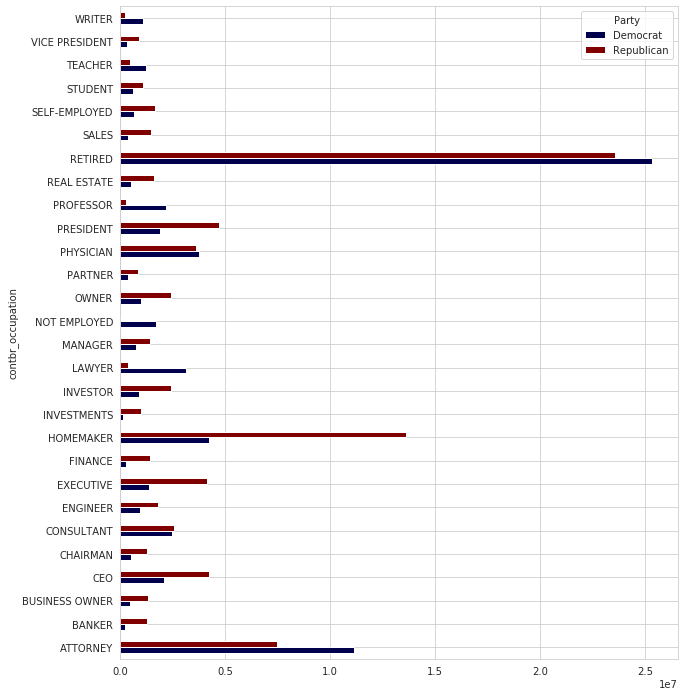

In [78]:
occupation_df.plot(kind='barh', figsize=(10,12), cmap='seismic')